# Context

This notebook aims at studying the learning and/or crafting of matrix $H$, the rhythmic patten matrix. The idea is to introduce prior knowledge on this matrix, in order to constraint the decomposition, and enhance interpretability. It could even enhance the decomposition for the task itself, but we can't be sure of that.

During previous experiments, we noticed that $H$ matrices seem all "stairish", without exploring this lead. 

In this Notebook, we will firstly try to study globally the shape of $H$ matrices that we have computed previously. This is made via clustering the columns of these $H$.

Secondly, we will craft a stair matrix by hand and test this matrix on a real NTD.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
import pandas as pd
import copy
from IPython.display import display

import musicntd.data_manipulation as dm
import musicntd.tensor_factory as tf
import musicntd.autosimilarity_segmentation as as_seg
from musicntd.model.current_plot import *
import musicntd.scripts.overall_scripts as scr
import musicntd.scripts.final_tests as test
import musicntd.scripts.hide_code as hide
from nn_fac import ntd as NTD

annotations_folder_path = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\annotations"
persisted_path = "C:\\Users\\amarmore\\Desktop\\data_persisted"
dataset = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Entire RWC"

annotations_type = "MIREX10"

annotations_folder = "{}\\{}".format(annotations_folder_path, annotations_type)
hop_length = 32
hop_length_seconds = 32/44100
subdivision = 96

convolution_type = "eight_bands"
penalty_func = "modulo8"
h_ranks = [12,16,20,24,28,32,36]

in_detail = True

# Clustering columns of $H$.

In order to study the shape of $H$, we will cluster the columns of the $H$ matrices we computed during quarantine. We indeed have a lot of these matrices, and in different conditions (notably with different ranks).

Clustering has the advantage of gathering close columns independantly of their order in the matrix, which is a limitation today in analysis of outcomes.

In [2]:
import sklearn

Concretely, we concatenate all the columns of all the $H$ matrices with different ranks (12,16,20,24,28,32,36), and we cluster all these columns. We hence cluster a unique $H$ matrix, containing $100 * 12 * 16 * ... * 36$ columns.

We will cluster this matrix with different number of centroids, tu study its behavior. The chosen number of clusters will be 4,8,12,16,24,32,40.

## Clustering the big $H$ with 4 clusters:

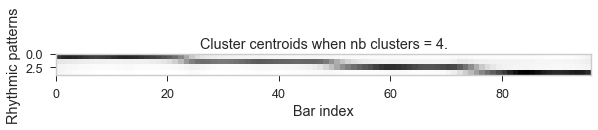

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (4 clus),4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


### For rank 12:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 16:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 20:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 24:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 28:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 32:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.


### For rank 36:

There are, in average for all songs, 4.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.



 ## In global:

In average, 4.0 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 700.0 matrix.
The cluster 1 is present in 700.0 matrix.
The cluster 2 is present in 700.0 matrix.
The cluster 3 is present in 700.0 matrix.


## Clustering the big $H$ with 8 clusters:

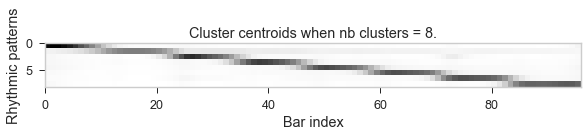

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (8 clus),7.9943,7.96,8.0,8.0,8.0,8.0,8.0,8.0


### For rank 12:

There are, in average for all songs, 7.96 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 99.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 98.0 matrix.
The cluster 6 is present in 99.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 16:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 20:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 24:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 28:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 32:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.


### For rank 36:

There are, in average for all songs, 8.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.



 ## In global:

In average, 7.994285714285715 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 700.0 matrix.
The cluster 1 is present in 700.0 matrix.
The cluster 2 is present in 700.0 matrix.
The cluster 3 is present in 699.0 matrix.
The cluster 4 is present in 700.0 matrix.
The cluster 5 is present in 698.0 matrix.
The cluster 6 is present in 699.0 matrix.
The cluster 7 is present in 700.0 matrix.


## Clustering the big $H$ with 12 clusters:

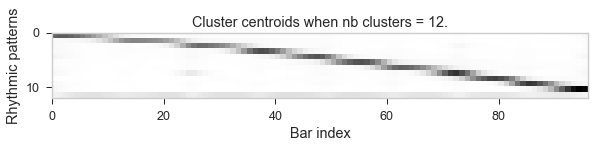

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (12 clus),11.6,10.4,11.37,11.7,11.79,11.94,12.0,12.0


### For rank 12:

There are, in average for all songs, 10.4 cluster represented in a H matrix.
The cluster 0 is present in 91.0 matrix.
The cluster 1 is present in 96.0 matrix.
The cluster 2 is present in 99.0 matrix.
The cluster 3 is present in 99.0 matrix.
The cluster 4 is present in 83.0 matrix.
The cluster 5 is present in 44.0 matrix.
The cluster 6 is present in 98.0 matrix.
The cluster 7 is present in 93.0 matrix.
The cluster 8 is present in 89.0 matrix.
The cluster 9 is present in 98.0 matrix.
The cluster 10 is present in 78.0 matrix.
The cluster 11 is present in 72.0 matrix.


### For rank 16:

There are, in average for all songs, 11.37 cluster represented in a H matrix.
The cluster 0 is present in 99.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 99.0 matrix.
The cluster 5 is present in 54.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 97.0 matrix.
The cluster 8 is present in 97.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 95.0 matrix.
The cluster 11 is present in 96.0 matrix.


### For rank 20:

There are, in average for all songs, 11.7 cluster represented in a H matrix.
The cluster 0 is present in 99.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 77.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 99.0 matrix.
The cluster 8 is present in 97.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 99.0 matrix.
The cluster 11 is present in 99.0 matrix.


### For rank 24:

There are, in average for all songs, 11.79 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 99.0 matrix.
The cluster 5 is present in 82.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 99.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 99.0 matrix.


### For rank 28:

There are, in average for all songs, 11.94 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 96.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 98.0 matrix.


### For rank 32:

There are, in average for all songs, 12.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 100.0 matrix.


### For rank 36:

There are, in average for all songs, 12.0 cluster represented in a H matrix.
The cluster 0 is present in 100.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 100.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 100.0 matrix.



 ## In global:

In average, 11.599999999999998 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 689.0 matrix.
The cluster 1 is present in 696.0 matrix.
The cluster 2 is present in 699.0 matrix.
The cluster 3 is present in 699.0 matrix.
The cluster 4 is present in 681.0 matrix.
The cluster 5 is present in 553.0 matrix.
The cluster 6 is present in 698.0 matrix.
The cluster 7 is present in 688.0 matrix.
The cluster 8 is present in 683.0 matrix.
The cluster 9 is present in 698.0 matrix.
The cluster 10 is present in 672.0 matrix.
The cluster 11 is present in 664.0 matrix.


## Clustering the big $H$ with 16 clusters:

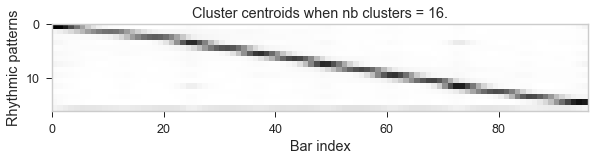

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (16 clus),14.8471,11.6,14.14,15.06,15.52,15.85,15.88,15.88


### For rank 12:

There are, in average for all songs, 11.6 cluster represented in a H matrix.
The cluster 0 is present in 75.0 matrix.
The cluster 1 is present in 86.0 matrix.
The cluster 2 is present in 65.0 matrix.
The cluster 3 is present in 36.0 matrix.
The cluster 4 is present in 77.0 matrix.
The cluster 5 is present in 92.0 matrix.
The cluster 6 is present in 79.0 matrix.
The cluster 7 is present in 58.0 matrix.
The cluster 8 is present in 82.0 matrix.
The cluster 9 is present in 91.0 matrix.
The cluster 10 is present in 44.0 matrix.
The cluster 11 is present in 77.0 matrix.
The cluster 12 is present in 55.0 matrix.
The cluster 13 is present in 91.0 matrix.
The cluster 14 is present in 84.0 matrix.
The cluster 15 is present in 68.0 matrix.


### For rank 16:

There are, in average for all songs, 14.14 cluster represented in a H matrix.
The cluster 0 is present in 92.0 matrix.
The cluster 1 is present in 93.0 matrix.
The cluster 2 is present in 90.0 matrix.
The cluster 3 is present in 46.0 matrix.
The cluster 4 is present in 89.0 matrix.
The cluster 5 is present in 98.0 matrix.
The cluster 6 is present in 97.0 matrix.
The cluster 7 is present in 81.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 93.0 matrix.
The cluster 10 is present in 82.0 matrix.
The cluster 11 is present in 95.0 matrix.
The cluster 12 is present in 81.0 matrix.
The cluster 13 is present in 96.0 matrix.
The cluster 14 is present in 94.0 matrix.
The cluster 15 is present in 87.0 matrix.


### For rank 20:

There are, in average for all songs, 15.06 cluster represented in a H matrix.
The cluster 0 is present in 96.0 matrix.
The cluster 1 is present in 97.0 matrix.
The cluster 2 is present in 94.0 matrix.
The cluster 3 is present in 74.0 matrix.
The cluster 4 is present in 96.0 matrix.
The cluster 5 is present in 98.0 matrix.
The cluster 6 is present in 98.0 matrix.
The cluster 7 is present in 92.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 98.0 matrix.
The cluster 10 is present in 93.0 matrix.
The cluster 11 is present in 99.0 matrix.
The cluster 12 is present in 90.0 matrix.
The cluster 13 is present in 96.0 matrix.
The cluster 14 is present in 97.0 matrix.
The cluster 15 is present in 88.0 matrix.


### For rank 24:

There are, in average for all songs, 15.52 cluster represented in a H matrix.
The cluster 0 is present in 96.0 matrix.
The cluster 1 is present in 99.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 78.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 99.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 95.0 matrix.
The cluster 8 is present in 99.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 98.0 matrix.
The cluster 11 is present in 100.0 matrix.
The cluster 12 is present in 92.0 matrix.
The cluster 13 is present in 98.0 matrix.
The cluster 14 is present in 98.0 matrix.
The cluster 15 is present in 100.0 matrix.


### For rank 28:

There are, in average for all songs, 15.85 cluster represented in a H matrix.
The cluster 0 is present in 98.0 matrix.
The cluster 1 is present in 100.0 matrix.
The cluster 2 is present in 99.0 matrix.
The cluster 3 is present in 97.0 matrix.
The cluster 4 is present in 99.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 99.0 matrix.
The cluster 7 is present in 98.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 100.0 matrix.
The cluster 12 is present in 99.0 matrix.
The cluster 13 is present in 99.0 matrix.
The cluster 14 is present in 100.0 matrix.
The cluster 15 is present in 97.0 matrix.


### For rank 32:

There are, in average for all songs, 15.88 cluster represented in a H matrix.
The cluster 0 is present in 99.0 matrix.
The cluster 1 is present in 98.0 matrix.
The cluster 2 is present in 99.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 100.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 99.0 matrix.
The cluster 8 is present in 100.0 matrix.
The cluster 9 is present in 99.0 matrix.
The cluster 10 is present in 98.0 matrix.
The cluster 11 is present in 100.0 matrix.
The cluster 12 is present in 100.0 matrix.
The cluster 13 is present in 98.0 matrix.
The cluster 14 is present in 100.0 matrix.
The cluster 15 is present in 98.0 matrix.


### For rank 36:

There are, in average for all songs, 15.88 cluster represented in a H matrix.
The cluster 0 is present in 98.0 matrix.
The cluster 1 is present in 99.0 matrix.
The cluster 2 is present in 99.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 99.0 matrix.
The cluster 5 is present in 100.0 matrix.
The cluster 6 is present in 100.0 matrix.
The cluster 7 is present in 97.0 matrix.
The cluster 8 is present in 99.0 matrix.
The cluster 9 is present in 100.0 matrix.
The cluster 10 is present in 100.0 matrix.
The cluster 11 is present in 100.0 matrix.
The cluster 12 is present in 98.0 matrix.
The cluster 13 is present in 99.0 matrix.
The cluster 14 is present in 100.0 matrix.
The cluster 15 is present in 100.0 matrix.



 ## In global:

In average, 14.847142857142856 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 654.0 matrix.
The cluster 1 is present in 672.0 matrix.
The cluster 2 is present in 646.0 matrix.
The cluster 3 is present in 531.0 matrix.
The cluster 4 is present in 660.0 matrix.
The cluster 5 is present in 687.0 matrix.
The cluster 6 is present in 673.0 matrix.
The cluster 7 is present in 620.0 matrix.
The cluster 8 is present in 680.0 matrix.
The cluster 9 is present in 681.0 matrix.
The cluster 10 is present in 615.0 matrix.
The cluster 11 is present in 671.0 matrix.
The cluster 12 is present in 615.0 matrix.
The cluster 13 is present in 677.0 matrix.
The cluster 14 is present in 673.0 matrix.
The cluster 15 is present in 638.0 matrix.


## Clustering the big $H$ with 24 clusters:

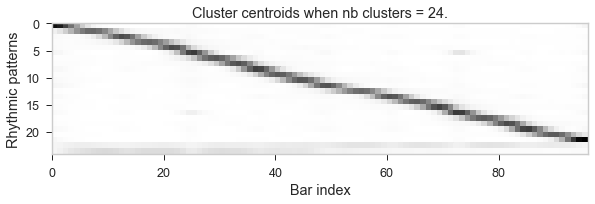

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (24 clus),18.6929,11.83,15.34,18.03,20.26,21.16,21.95,22.28


### For rank 12:

There are, in average for all songs, 11.83 cluster represented in a H matrix.
The cluster 0 is present in 28.0 matrix.
The cluster 1 is present in 27.0 matrix.
The cluster 2 is present in 31.0 matrix.
The cluster 3 is present in 84.0 matrix.
The cluster 4 is present in 39.0 matrix.
The cluster 5 is present in 47.0 matrix.
The cluster 6 is present in 42.0 matrix.
The cluster 7 is present in 47.0 matrix.
The cluster 8 is present in 18.0 matrix.
The cluster 9 is present in 73.0 matrix.
The cluster 10 is present in 61.0 matrix.
The cluster 11 is present in 68.0 matrix.
The cluster 12 is present in 77.0 matrix.
The cluster 13 is present in 48.0 matrix.
The cluster 14 is present in 19.0 matrix.
The cluster 15 is present in 59.0 matrix.
The cluster 16 is present in 68.0 matrix.
The cluster 17 is present in 30.0 matrix.
The cluster 18 is present in 32.0 matrix.
The cluster 19 is present in 41.0 matrix.
The cluster 20 is present in 68.0 matrix.
The cluster 21 is present in 28.0 matrix.
The clus

### For rank 16:

There are, in average for all songs, 15.34 cluster represented in a H matrix.
The cluster 0 is present in 60.0 matrix.
The cluster 1 is present in 49.0 matrix.
The cluster 2 is present in 36.0 matrix.
The cluster 3 is present in 94.0 matrix.
The cluster 4 is present in 74.0 matrix.
The cluster 5 is present in 61.0 matrix.
The cluster 6 is present in 63.0 matrix.
The cluster 7 is present in 68.0 matrix.
The cluster 8 is present in 41.0 matrix.
The cluster 9 is present in 78.0 matrix.
The cluster 10 is present in 82.0 matrix.
The cluster 11 is present in 60.0 matrix.
The cluster 12 is present in 71.0 matrix.
The cluster 13 is present in 72.0 matrix.
The cluster 14 is present in 24.0 matrix.
The cluster 15 is present in 82.0 matrix.
The cluster 16 is present in 81.0 matrix.
The cluster 17 is present in 40.0 matrix.
The cluster 18 is present in 66.0 matrix.
The cluster 19 is present in 67.0 matrix.
The cluster 20 is present in 73.0 matrix.
The cluster 21 is present in 46.0 matrix.
The clus

### For rank 20:

There are, in average for all songs, 18.03 cluster represented in a H matrix.
The cluster 0 is present in 76.0 matrix.
The cluster 1 is present in 62.0 matrix.
The cluster 2 is present in 64.0 matrix.
The cluster 3 is present in 97.0 matrix.
The cluster 4 is present in 87.0 matrix.
The cluster 5 is present in 73.0 matrix.
The cluster 6 is present in 71.0 matrix.
The cluster 7 is present in 77.0 matrix.
The cluster 8 is present in 61.0 matrix.
The cluster 9 is present in 74.0 matrix.
The cluster 10 is present in 88.0 matrix.
The cluster 11 is present in 68.0 matrix.
The cluster 12 is present in 76.0 matrix.
The cluster 13 is present in 80.0 matrix.
The cluster 14 is present in 47.0 matrix.
The cluster 15 is present in 85.0 matrix.
The cluster 16 is present in 94.0 matrix.
The cluster 17 is present in 58.0 matrix.
The cluster 18 is present in 85.0 matrix.
The cluster 19 is present in 72.0 matrix.
The cluster 20 is present in 75.0 matrix.
The cluster 21 is present in 67.0 matrix.
The clus

### For rank 24:

There are, in average for all songs, 20.26 cluster represented in a H matrix.
The cluster 0 is present in 82.0 matrix.
The cluster 1 is present in 79.0 matrix.
The cluster 2 is present in 62.0 matrix.
The cluster 3 is present in 98.0 matrix.
The cluster 4 is present in 94.0 matrix.
The cluster 5 is present in 89.0 matrix.
The cluster 6 is present in 82.0 matrix.
The cluster 7 is present in 87.0 matrix.
The cluster 8 is present in 72.0 matrix.
The cluster 9 is present in 87.0 matrix.
The cluster 10 is present in 95.0 matrix.
The cluster 11 is present in 80.0 matrix.
The cluster 12 is present in 82.0 matrix.
The cluster 13 is present in 85.0 matrix.
The cluster 14 is present in 61.0 matrix.
The cluster 15 is present in 97.0 matrix.
The cluster 16 is present in 99.0 matrix.
The cluster 17 is present in 66.0 matrix.
The cluster 18 is present in 96.0 matrix.
The cluster 19 is present in 86.0 matrix.
The cluster 20 is present in 85.0 matrix.
The cluster 21 is present in 76.0 matrix.
The clus

### For rank 28:

There are, in average for all songs, 21.16 cluster represented in a H matrix.
The cluster 0 is present in 88.0 matrix.
The cluster 1 is present in 79.0 matrix.
The cluster 2 is present in 93.0 matrix.
The cluster 3 is present in 99.0 matrix.
The cluster 4 is present in 97.0 matrix.
The cluster 5 is present in 90.0 matrix.
The cluster 6 is present in 84.0 matrix.
The cluster 7 is present in 83.0 matrix.
The cluster 8 is present in 78.0 matrix.
The cluster 9 is present in 92.0 matrix.
The cluster 10 is present in 97.0 matrix.
The cluster 11 is present in 88.0 matrix.
The cluster 12 is present in 90.0 matrix.
The cluster 13 is present in 92.0 matrix.
The cluster 14 is present in 77.0 matrix.
The cluster 15 is present in 93.0 matrix.
The cluster 16 is present in 96.0 matrix.
The cluster 17 is present in 76.0 matrix.
The cluster 18 is present in 94.0 matrix.
The cluster 19 is present in 86.0 matrix.
The cluster 20 is present in 87.0 matrix.
The cluster 21 is present in 70.0 matrix.
The clus

### For rank 32:

There are, in average for all songs, 21.95 cluster represented in a H matrix.
The cluster 0 is present in 89.0 matrix.
The cluster 1 is present in 89.0 matrix.
The cluster 2 is present in 96.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 98.0 matrix.
The cluster 5 is present in 94.0 matrix.
The cluster 6 is present in 86.0 matrix.
The cluster 7 is present in 89.0 matrix.
The cluster 8 is present in 74.0 matrix.
The cluster 9 is present in 93.0 matrix.
The cluster 10 is present in 97.0 matrix.
The cluster 11 is present in 87.0 matrix.
The cluster 12 is present in 91.0 matrix.
The cluster 13 is present in 93.0 matrix.
The cluster 14 is present in 95.0 matrix.
The cluster 15 is present in 98.0 matrix.
The cluster 16 is present in 99.0 matrix.
The cluster 17 is present in 80.0 matrix.
The cluster 18 is present in 96.0 matrix.
The cluster 19 is present in 89.0 matrix.
The cluster 20 is present in 90.0 matrix.
The cluster 21 is present in 81.0 matrix.
The clu

### For rank 36:

There are, in average for all songs, 22.28 cluster represented in a H matrix.
The cluster 0 is present in 92.0 matrix.
The cluster 1 is present in 85.0 matrix.
The cluster 2 is present in 100.0 matrix.
The cluster 3 is present in 100.0 matrix.
The cluster 4 is present in 99.0 matrix.
The cluster 5 is present in 95.0 matrix.
The cluster 6 is present in 89.0 matrix.
The cluster 7 is present in 91.0 matrix.
The cluster 8 is present in 81.0 matrix.
The cluster 9 is present in 92.0 matrix.
The cluster 10 is present in 98.0 matrix.
The cluster 11 is present in 89.0 matrix.
The cluster 12 is present in 95.0 matrix.
The cluster 13 is present in 88.0 matrix.
The cluster 14 is present in 95.0 matrix.
The cluster 15 is present in 100.0 matrix.
The cluster 16 is present in 98.0 matrix.
The cluster 17 is present in 85.0 matrix.
The cluster 18 is present in 99.0 matrix.
The cluster 19 is present in 93.0 matrix.
The cluster 20 is present in 89.0 matrix.
The cluster 21 is present in 87.0 matrix.
The c


 ## In global:

In average, 18.692857142857147 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 515.0 matrix.
The cluster 1 is present in 470.0 matrix.
The cluster 2 is present in 482.0 matrix.
The cluster 3 is present in 672.0 matrix.
The cluster 4 is present in 588.0 matrix.
The cluster 5 is present in 549.0 matrix.
The cluster 6 is present in 517.0 matrix.
The cluster 7 is present in 542.0 matrix.
The cluster 8 is present in 425.0 matrix.
The cluster 9 is present in 589.0 matrix.
The cluster 10 is present in 618.0 matrix.
The cluster 11 is present in 540.0 matrix.
The cluster 12 is present in 582.0 matrix.
The cluster 13 is present in 558.0 matrix.
The cluster 14 is present in 418.0 matrix.
The cluster 15 is present in 614.0 matrix.
The cluster 16 is present in 635.0 matrix.
The cluster 17 is present in 435.0 matrix.
The cluster 18 is present in 568.0 matrix.
The cluster 19 is present in 534.0 matrix.
The cluster 20 is present in 567.0 matrix.
The cluster 21 is pres

## Clustering the big $H$ with 32 clusters:

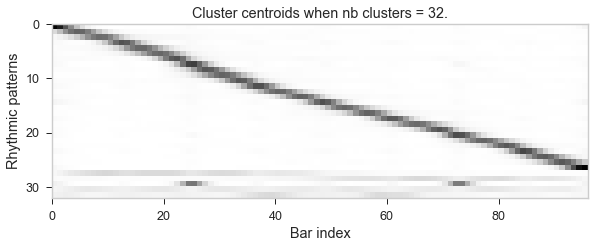

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (32 clus),20.4286,11.92,15.61,18.76,21.95,23.59,25.14,26.03


### For rank 12:

There are, in average for all songs, 11.92 cluster represented in a H matrix.
The cluster 0 is present in 31.0 matrix.
The cluster 1 is present in 16.0 matrix.
The cluster 2 is present in 37.0 matrix.
The cluster 3 is present in 11.0 matrix.
The cluster 4 is present in 45.0 matrix.
The cluster 5 is present in 8.0 matrix.
The cluster 6 is present in 49.0 matrix.
The cluster 7 is present in 32.0 matrix.
The cluster 8 is present in 79.0 matrix.
The cluster 9 is present in 36.0 matrix.
The cluster 10 is present in 43.0 matrix.
The cluster 11 is present in 25.0 matrix.
The cluster 12 is present in 55.0 matrix.
The cluster 13 is present in 38.0 matrix.
The cluster 14 is present in 46.0 matrix.
The cluster 15 is present in 12.0 matrix.
The cluster 16 is present in 26.0 matrix.
The cluster 17 is present in 61.0 matrix.
The cluster 18 is present in 42.0 matrix.
The cluster 19 is present in 16.0 matrix.
The cluster 20 is present in 21.0 matrix.
The cluster 21 is present in 46.0 matrix.
The clust

### For rank 16:

There are, in average for all songs, 15.61 cluster represented in a H matrix.
The cluster 0 is present in 40.0 matrix.
The cluster 1 is present in 19.0 matrix.
The cluster 2 is present in 64.0 matrix.
The cluster 3 is present in 12.0 matrix.
The cluster 4 is present in 69.0 matrix.
The cluster 5 is present in 27.0 matrix.
The cluster 6 is present in 59.0 matrix.
The cluster 7 is present in 58.0 matrix.
The cluster 8 is present in 68.0 matrix.
The cluster 9 is present in 49.0 matrix.
The cluster 10 is present in 39.0 matrix.
The cluster 11 is present in 24.0 matrix.
The cluster 12 is present in 60.0 matrix.
The cluster 13 is present in 63.0 matrix.
The cluster 14 is present in 44.0 matrix.
The cluster 15 is present in 48.0 matrix.
The cluster 16 is present in 63.0 matrix.
The cluster 17 is present in 56.0 matrix.
The cluster 18 is present in 59.0 matrix.
The cluster 19 is present in 29.0 matrix.
The cluster 20 is present in 56.0 matrix.
The cluster 21 is present in 66.0 matrix.
The clus

### For rank 20:

There are, in average for all songs, 18.76 cluster represented in a H matrix.
The cluster 0 is present in 64.0 matrix.
The cluster 1 is present in 34.0 matrix.
The cluster 2 is present in 71.0 matrix.
The cluster 3 is present in 35.0 matrix.
The cluster 4 is present in 87.0 matrix.
The cluster 5 is present in 40.0 matrix.
The cluster 6 is present in 66.0 matrix.
The cluster 7 is present in 72.0 matrix.
The cluster 8 is present in 74.0 matrix.
The cluster 9 is present in 64.0 matrix.
The cluster 10 is present in 30.0 matrix.
The cluster 11 is present in 32.0 matrix.
The cluster 12 is present in 66.0 matrix.
The cluster 13 is present in 69.0 matrix.
The cluster 14 is present in 48.0 matrix.
The cluster 15 is present in 62.0 matrix.
The cluster 16 is present in 75.0 matrix.
The cluster 17 is present in 49.0 matrix.
The cluster 18 is present in 68.0 matrix.
The cluster 19 is present in 42.0 matrix.
The cluster 20 is present in 78.0 matrix.
The cluster 21 is present in 75.0 matrix.
The clus

### For rank 24:

There are, in average for all songs, 21.95 cluster represented in a H matrix.
The cluster 0 is present in 77.0 matrix.
The cluster 1 is present in 44.0 matrix.
The cluster 2 is present in 82.0 matrix.
The cluster 3 is present in 27.0 matrix.
The cluster 4 is present in 92.0 matrix.
The cluster 5 is present in 60.0 matrix.
The cluster 6 is present in 81.0 matrix.
The cluster 7 is present in 76.0 matrix.
The cluster 8 is present in 80.0 matrix.
The cluster 9 is present in 74.0 matrix.
The cluster 10 is present in 35.0 matrix.
The cluster 11 is present in 41.0 matrix.
The cluster 12 is present in 84.0 matrix.
The cluster 13 is present in 81.0 matrix.
The cluster 14 is present in 67.0 matrix.
The cluster 15 is present in 73.0 matrix.
The cluster 16 is present in 87.0 matrix.
The cluster 17 is present in 61.0 matrix.
The cluster 18 is present in 78.0 matrix.
The cluster 19 is present in 58.0 matrix.
The cluster 20 is present in 86.0 matrix.
The cluster 21 is present in 90.0 matrix.
The clus

### For rank 28:

There are, in average for all songs, 23.59 cluster represented in a H matrix.
The cluster 0 is present in 71.0 matrix.
The cluster 1 is present in 63.0 matrix.
The cluster 2 is present in 79.0 matrix.
The cluster 3 is present in 51.0 matrix.
The cluster 4 is present in 87.0 matrix.
The cluster 5 is present in 61.0 matrix.
The cluster 6 is present in 80.0 matrix.
The cluster 7 is present in 85.0 matrix.
The cluster 8 is present in 88.0 matrix.
The cluster 9 is present in 73.0 matrix.
The cluster 10 is present in 33.0 matrix.
The cluster 11 is present in 52.0 matrix.
The cluster 12 is present in 81.0 matrix.
The cluster 13 is present in 80.0 matrix.
The cluster 14 is present in 73.0 matrix.
The cluster 15 is present in 76.0 matrix.
The cluster 16 is present in 90.0 matrix.
The cluster 17 is present in 70.0 matrix.
The cluster 18 is present in 86.0 matrix.
The cluster 19 is present in 65.0 matrix.
The cluster 20 is present in 89.0 matrix.
The cluster 21 is present in 93.0 matrix.
The clus

### For rank 32:

There are, in average for all songs, 25.14 cluster represented in a H matrix.
The cluster 0 is present in 76.0 matrix.
The cluster 1 is present in 80.0 matrix.
The cluster 2 is present in 86.0 matrix.
The cluster 3 is present in 69.0 matrix.
The cluster 4 is present in 95.0 matrix.
The cluster 5 is present in 65.0 matrix.
The cluster 6 is present in 83.0 matrix.
The cluster 7 is present in 87.0 matrix.
The cluster 8 is present in 89.0 matrix.
The cluster 9 is present in 82.0 matrix.
The cluster 10 is present in 31.0 matrix.
The cluster 11 is present in 54.0 matrix.
The cluster 12 is present in 86.0 matrix.
The cluster 13 is present in 85.0 matrix.
The cluster 14 is present in 72.0 matrix.
The cluster 15 is present in 77.0 matrix.
The cluster 16 is present in 92.0 matrix.
The cluster 17 is present in 71.0 matrix.
The cluster 18 is present in 91.0 matrix.
The cluster 19 is present in 77.0 matrix.
The cluster 20 is present in 91.0 matrix.
The cluster 21 is present in 95.0 matrix.
The clus

### For rank 36:

There are, in average for all songs, 26.03 cluster represented in a H matrix.
The cluster 0 is present in 82.0 matrix.
The cluster 1 is present in 78.0 matrix.
The cluster 2 is present in 91.0 matrix.
The cluster 3 is present in 86.0 matrix.
The cluster 4 is present in 94.0 matrix.
The cluster 5 is present in 69.0 matrix.
The cluster 6 is present in 83.0 matrix.
The cluster 7 is present in 85.0 matrix.
The cluster 8 is present in 92.0 matrix.
The cluster 9 is present in 87.0 matrix.
The cluster 10 is present in 37.0 matrix.
The cluster 11 is present in 58.0 matrix.
The cluster 12 is present in 90.0 matrix.
The cluster 13 is present in 89.0 matrix.
The cluster 14 is present in 79.0 matrix.
The cluster 15 is present in 84.0 matrix.
The cluster 16 is present in 92.0 matrix.
The cluster 17 is present in 70.0 matrix.
The cluster 18 is present in 83.0 matrix.
The cluster 19 is present in 74.0 matrix.
The cluster 20 is present in 91.0 matrix.
The cluster 21 is present in 96.0 matrix.
The clus


 ## In global:

In average, 20.428571428571427 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 441.0 matrix.
The cluster 1 is present in 334.0 matrix.
The cluster 2 is present in 510.0 matrix.
The cluster 3 is present in 291.0 matrix.
The cluster 4 is present in 569.0 matrix.
The cluster 5 is present in 330.0 matrix.
The cluster 6 is present in 501.0 matrix.
The cluster 7 is present in 495.0 matrix.
The cluster 8 is present in 570.0 matrix.
The cluster 9 is present in 465.0 matrix.
The cluster 10 is present in 248.0 matrix.
The cluster 11 is present in 286.0 matrix.
The cluster 12 is present in 522.0 matrix.
The cluster 13 is present in 505.0 matrix.
The cluster 14 is present in 429.0 matrix.
The cluster 15 is present in 432.0 matrix.
The cluster 16 is present in 525.0 matrix.
The cluster 17 is present in 438.0 matrix.
The cluster 18 is present in 507.0 matrix.
The cluster 19 is present in 361.0 matrix.
The cluster 20 is present in 512.0 matrix.
The cluster 21 is pres

## Clustering the big $H$ with 40 clusters:

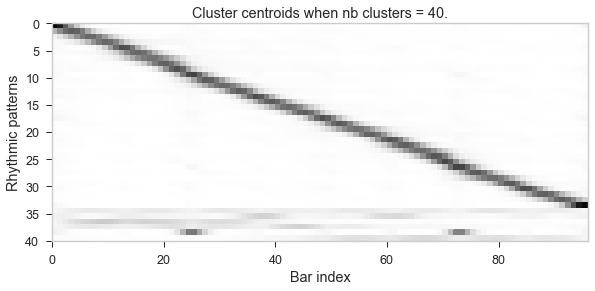

,For all ranks,Rank H:12,Rank H:16,Rank H:20,Rank H:24,Rank H:28,Rank H:32,Rank H:36
Avg nb of $\neq$ clusters per $H$ (40 clus),21.2443,11.95,15.75,19.09,22.55,24.63,26.55,28.19


### For rank 12:

There are, in average for all songs, 11.95 cluster represented in a H matrix.
The cluster 0 is present in 33.0 matrix.
The cluster 1 is present in 20.0 matrix.
The cluster 2 is present in 35.0 matrix.
The cluster 3 is present in 21.0 matrix.
The cluster 4 is present in 38.0 matrix.
The cluster 5 is present in 68.0 matrix.
The cluster 6 is present in 11.0 matrix.
The cluster 7 is present in 41.0 matrix.
The cluster 8 is present in 22.0 matrix.
The cluster 9 is present in 18.0 matrix.
The cluster 10 is present in 57.0 matrix.
The cluster 11 is present in 58.0 matrix.
The cluster 12 is present in 8.0 matrix.
The cluster 13 is present in 31.0 matrix.
The cluster 14 is present in 18.0 matrix.
The cluster 15 is present in 14.0 matrix.
The cluster 16 is present in 16.0 matrix.
The cluster 17 is present in 38.0 matrix.
The cluster 18 is present in 19.0 matrix.
The cluster 19 is present in 74.0 matrix.
The cluster 20 is present in 10.0 matrix.
The cluster 21 is present in 22.0 matrix.
The clust

### For rank 16:

There are, in average for all songs, 15.75 cluster represented in a H matrix.
The cluster 0 is present in 37.0 matrix.
The cluster 1 is present in 30.0 matrix.
The cluster 2 is present in 47.0 matrix.
The cluster 3 is present in 35.0 matrix.
The cluster 4 is present in 43.0 matrix.
The cluster 5 is present in 54.0 matrix.
The cluster 6 is present in 19.0 matrix.
The cluster 7 is present in 56.0 matrix.
The cluster 8 is present in 56.0 matrix.
The cluster 9 is present in 31.0 matrix.
The cluster 10 is present in 61.0 matrix.
The cluster 11 is present in 68.0 matrix.
The cluster 12 is present in 13.0 matrix.
The cluster 13 is present in 56.0 matrix.
The cluster 14 is present in 16.0 matrix.
The cluster 15 is present in 35.0 matrix.
The cluster 16 is present in 32.0 matrix.
The cluster 17 is present in 52.0 matrix.
The cluster 18 is present in 17.0 matrix.
The cluster 19 is present in 74.0 matrix.
The cluster 20 is present in 12.0 matrix.
The cluster 21 is present in 35.0 matrix.
The clus

### For rank 20:

There are, in average for all songs, 19.09 cluster represented in a H matrix.
The cluster 0 is present in 35.0 matrix.
The cluster 1 is present in 50.0 matrix.
The cluster 2 is present in 62.0 matrix.
The cluster 3 is present in 52.0 matrix.
The cluster 4 is present in 46.0 matrix.
The cluster 5 is present in 51.0 matrix.
The cluster 6 is present in 35.0 matrix.
The cluster 7 is present in 67.0 matrix.
The cluster 8 is present in 81.0 matrix.
The cluster 9 is present in 38.0 matrix.
The cluster 10 is present in 68.0 matrix.
The cluster 11 is present in 65.0 matrix.
The cluster 12 is present in 29.0 matrix.
The cluster 13 is present in 71.0 matrix.
The cluster 14 is present in 20.0 matrix.
The cluster 15 is present in 39.0 matrix.
The cluster 16 is present in 47.0 matrix.
The cluster 17 is present in 60.0 matrix.
The cluster 18 is present in 29.0 matrix.
The cluster 19 is present in 63.0 matrix.
The cluster 20 is present in 30.0 matrix.
The cluster 21 is present in 34.0 matrix.
The clus

### For rank 24:

There are, in average for all songs, 22.55 cluster represented in a H matrix.
The cluster 0 is present in 54.0 matrix.
The cluster 1 is present in 55.0 matrix.
The cluster 2 is present in 72.0 matrix.
The cluster 3 is present in 60.0 matrix.
The cluster 4 is present in 56.0 matrix.
The cluster 5 is present in 58.0 matrix.
The cluster 6 is present in 54.0 matrix.
The cluster 7 is present in 81.0 matrix.
The cluster 8 is present in 89.0 matrix.
The cluster 9 is present in 37.0 matrix.
The cluster 10 is present in 59.0 matrix.
The cluster 11 is present in 67.0 matrix.
The cluster 12 is present in 39.0 matrix.
The cluster 13 is present in 85.0 matrix.
The cluster 14 is present in 31.0 matrix.
The cluster 15 is present in 49.0 matrix.
The cluster 16 is present in 63.0 matrix.
The cluster 17 is present in 77.0 matrix.
The cluster 18 is present in 29.0 matrix.
The cluster 19 is present in 69.0 matrix.
The cluster 20 is present in 39.0 matrix.
The cluster 21 is present in 59.0 matrix.
The clus

### For rank 28:

There are, in average for all songs, 24.63 cluster represented in a H matrix.
The cluster 0 is present in 53.0 matrix.
The cluster 1 is present in 77.0 matrix.
The cluster 2 is present in 72.0 matrix.
The cluster 3 is present in 64.0 matrix.
The cluster 4 is present in 60.0 matrix.
The cluster 5 is present in 72.0 matrix.
The cluster 6 is present in 56.0 matrix.
The cluster 7 is present in 85.0 matrix.
The cluster 8 is present in 92.0 matrix.
The cluster 9 is present in 45.0 matrix.
The cluster 10 is present in 71.0 matrix.
The cluster 11 is present in 65.0 matrix.
The cluster 12 is present in 44.0 matrix.
The cluster 13 is present in 77.0 matrix.
The cluster 14 is present in 45.0 matrix.
The cluster 15 is present in 45.0 matrix.
The cluster 16 is present in 62.0 matrix.
The cluster 17 is present in 80.0 matrix.
The cluster 18 is present in 50.0 matrix.
The cluster 19 is present in 71.0 matrix.
The cluster 20 is present in 58.0 matrix.
The cluster 21 is present in 55.0 matrix.
The clus

### For rank 32:

There are, in average for all songs, 26.55 cluster represented in a H matrix.
The cluster 0 is present in 57.0 matrix.
The cluster 1 is present in 87.0 matrix.
The cluster 2 is present in 77.0 matrix.
The cluster 3 is present in 76.0 matrix.
The cluster 4 is present in 62.0 matrix.
The cluster 5 is present in 64.0 matrix.
The cluster 6 is present in 61.0 matrix.
The cluster 7 is present in 92.0 matrix.
The cluster 8 is present in 93.0 matrix.
The cluster 9 is present in 50.0 matrix.
The cluster 10 is present in 73.0 matrix.
The cluster 11 is present in 59.0 matrix.
The cluster 12 is present in 54.0 matrix.
The cluster 13 is present in 87.0 matrix.
The cluster 14 is present in 47.0 matrix.
The cluster 15 is present in 48.0 matrix.
The cluster 16 is present in 67.0 matrix.
The cluster 17 is present in 87.0 matrix.
The cluster 18 is present in 52.0 matrix.
The cluster 19 is present in 69.0 matrix.
The cluster 20 is present in 76.0 matrix.
The cluster 21 is present in 54.0 matrix.
The clus

### For rank 36:

There are, in average for all songs, 28.19 cluster represented in a H matrix.
The cluster 0 is present in 63.0 matrix.
The cluster 1 is present in 91.0 matrix.
The cluster 2 is present in 83.0 matrix.
The cluster 3 is present in 74.0 matrix.
The cluster 4 is present in 62.0 matrix.
The cluster 5 is present in 67.0 matrix.
The cluster 6 is present in 74.0 matrix.
The cluster 7 is present in 89.0 matrix.
The cluster 8 is present in 92.0 matrix.
The cluster 9 is present in 51.0 matrix.
The cluster 10 is present in 71.0 matrix.
The cluster 11 is present in 75.0 matrix.
The cluster 12 is present in 61.0 matrix.
The cluster 13 is present in 88.0 matrix.
The cluster 14 is present in 57.0 matrix.
The cluster 15 is present in 56.0 matrix.
The cluster 16 is present in 76.0 matrix.
The cluster 17 is present in 87.0 matrix.
The cluster 18 is present in 57.0 matrix.
The cluster 19 is present in 67.0 matrix.
The cluster 20 is present in 80.0 matrix.
The cluster 21 is present in 72.0 matrix.
The clus


 ## In global:

In average, 21.244285714285716 clusters are represented in a H matrix, for any rank.
The cluster 0 is present in 332.0 matrix.
The cluster 1 is present in 410.0 matrix.
The cluster 2 is present in 448.0 matrix.
The cluster 3 is present in 382.0 matrix.
The cluster 4 is present in 367.0 matrix.
The cluster 5 is present in 434.0 matrix.
The cluster 6 is present in 310.0 matrix.
The cluster 7 is present in 511.0 matrix.
The cluster 8 is present in 525.0 matrix.
The cluster 9 is present in 270.0 matrix.
The cluster 10 is present in 460.0 matrix.
The cluster 11 is present in 457.0 matrix.
The cluster 12 is present in 248.0 matrix.
The cluster 13 is present in 495.0 matrix.
The cluster 14 is present in 234.0 matrix.
The cluster 15 is present in 286.0 matrix.
The cluster 16 is present in 363.0 matrix.
The cluster 17 is present in 481.0 matrix.
The cluster 18 is present in 253.0 matrix.
The cluster 19 is present in 487.0 matrix.
The cluster 20 is present in 305.0 matrix.
The cluster 21 is pres

In [11]:
dataset_paths = scr.load_RWC_dataset(dataset, annotations_type)
different_nb_clusters = 4,8,12,16,24,32,40
big_h = []
for rank_h in h_ranks:
    ranks = [12,rank_h,32]
    median_h = np.zeros((rank_h,96))
    for song_and_annotations in dataset_paths:
        song_number = song_and_annotations[0].replace(".wav","")
        annot_path = "{}\\{}".format(annotations_folder, song_and_annotations[1])
        annotations = dm.get_segmentation_from_txt(annot_path, annotations_type)
        references_segments = np.array(annotations)[:, 0:2]

        bars, spectrogram = scr.load_or_save_spectrogram_and_bars(persisted_path, "{}\\{}".format(dataset, song_number), "pcp", hop_length)

        tensor_spectrogram = tf.tensorize_barwise(spectrogram, bars, hop_length_seconds, subdivision)

        persisted_arguments = "_{}_{}_{}_{}".format(song_number, "pcp", "chromas", subdivision)
        core, factors = scr.NTD_decomp_as_script(persisted_path, persisted_arguments, tensor_spectrogram, ranks, init = "chromas")
        for column_h in factors[1].T:
            big_h.append(column_h)

for n_clus in different_nb_clusters:
    smart_array = []
    col_idx = 0
    kmeans = sklearn.cluster.KMeans(n_clusters = n_clus).fit(big_h)
    k_means_cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    for rank_h in h_ranks:
        a_rank_mat = []
        for song_index in range(len(dataset_paths)):
            a_rank_mat.append(labels[col_idx:col_idx + rank_h])
            col_idx += rank_h
        smart_array.append(a_rank_mat)
    hide.printmd("## Clustering the big $H$ with {} clusters:".format(n_clus))
    plot_permuted_factor(k_means_cluster_centers.T, title = "Cluster centroids when nb clusters = {}.".format(n_clus), x_axis = "Bar index", y_axis = "Rhythmic patterns")
    
    list_of_avg_cluster_per_rank = []
    for idx in range(len(h_ranks)):
        nb_cluster_per_matrix = 0
        for lab in smart_array[idx]:
            nb_cluster_per_matrix += len(np.unique(lab))
        list_of_avg_cluster_per_rank.append(nb_cluster_per_matrix/100)

    to_dataframe = [np.sum(list_of_avg_cluster_per_rank)/len(h_ranks)]
    col = ["For all ranks"]
    for i in range(len(h_ranks)):
        to_dataframe.append(list_of_avg_cluster_per_rank[i])
        col.append("Rank H:{}".format(h_ranks[i]))
    df = pd.DataFrame(np.array(to_dataframe), columns=["Avg nb of $\neq$ clusters per $H$ ({} clus)".format(n_clus)], index=col).T
    display(df)
    
    if in_detail:
        global_avg = 0
        global_nb_mat_per_clus = np.zeros(n_clus)
        for idx in range(len(h_ranks)):
            avg_nb_cluster_per_matrix = 0
            nb_matrix_per_cluster = np.zeros(n_clus)
            for lab in smart_array[idx]:
                avg_nb_cluster_per_matrix += len(np.unique(lab))
                for clus_lab in range(n_clus):
                    if clus_lab in lab:
                        nb_matrix_per_cluster[clus_lab] += 1
            avg_per_rank = avg_nb_cluster_per_matrix/100
            hide.printmd("### For rank {}:".format(h_ranks[idx]))
            print("There are, in average for all songs, {} cluster represented in a H matrix.".format(avg_per_rank))
            for i in range(n_clus):
                print("The cluster {} is present in {} matrix.".format(i, nb_matrix_per_cluster[i]))
                global_nb_mat_per_clus[i] += nb_matrix_per_cluster[i]
            global_avg += avg_per_rank
        hide.printmd("\n ## In global:")
        print("In average, {} clusters are represented in a H matrix, for any rank.".format(global_avg/len(h_ranks)))
        for i in range(n_clus):
            print("The cluster {} is present in {} matrix.".format(i, global_nb_mat_per_clus[i]))

These results tend to prove that all $H$ matrices, in RWC Pop, and in different conditions, seem stairish.

In addition, it seems that, the larger the rank, the more precise columns are, and the more "blurry columns" we have (the number of non-stairish columns at the end).

# Creating H matrix

Finally, another option would be to create from scratch a $H$ matrix.

For this sake, we implement a $H$ matrix looking as gaussian distribution on each column, spanning all possible time position in the bar.

In [4]:
import scipy

In [12]:
def build_H(size_gauss, gaussian_std):
    size = int(subdivision/size_gauss)
    tab = np.array(np.zeros((2*size,subdivision)))
    for i in range(size):
        reste = int(round(subdivision-size_gauss*(i+1)))
        if reste >= 0:
            to_add = np.concatenate((np.zeros((size_gauss*i)),scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True),np.zeros((reste))))
        else:
            to_add = np.concatenate((scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True)[size_gauss + reste:],np.zeros((subdivision - size_gauss)),scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True)[:abs(reste)]))
        tab[2*i] = to_add

        reste = int(round(subdivision-size_gauss*(i+3/2)))
        if reste >= 0:
            to_add = np.concatenate((np.zeros((int(size_gauss*(i + 1/2)))),scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True),np.zeros((reste))))
        else:
            to_add = np.concatenate((scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True)[size_gauss + reste:],np.zeros((subdivision - size_gauss)),scipy.signal.windows.gaussian(size_gauss, gaussian_std, sym=True)[:abs(reste)]))
        tab[2*i + 1] = to_add

    """line_croche = np.array([])
    for i in range(4): # on times
        line_croche = np.append(line_croche, np.concatenate((scipy.signal.windows.gaussian(size_gauss/1, gaussian_std, sym=True),np.zeros((int(subdivision/4 - size_gauss/1))))))
    tab[2*size] = line_croche

    line_counter_croche = np.array([])
    for i in range(8): # on times and counter-times
        line_counter_croche = np.append(line_counter_croche, np.concatenate((scipy.signal.windows.gaussian(size_gauss/1, gaussian_std, sym=True),np.zeros((int(subdivision/8 - size_gauss/1))))))
    tab[2*size + 1] = line_counter_croche"""
    return tab

In order to construct a $H$ matrix, we have to specify the size of each gaussian distribution, and its standard deviation (*how much* values and *how are they close* to each other).

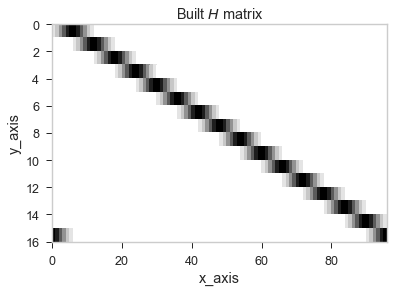

In [13]:
H_0 = build_H(12,3)
plot_me_this_spectrogram(H_0, title = "Built $H$ matrix")

In order to evaluate this matrix, we will compare a classic NTD (when everything is optimized) with a NTD with our built $H$ matrix.

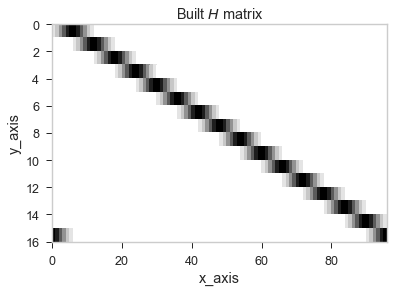

Irrelevant number of sparsity coefficient (different from the number of modes + 1 for the core), they have been set to None.


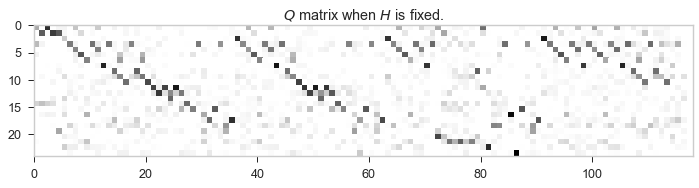

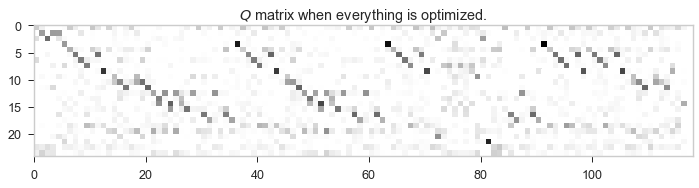

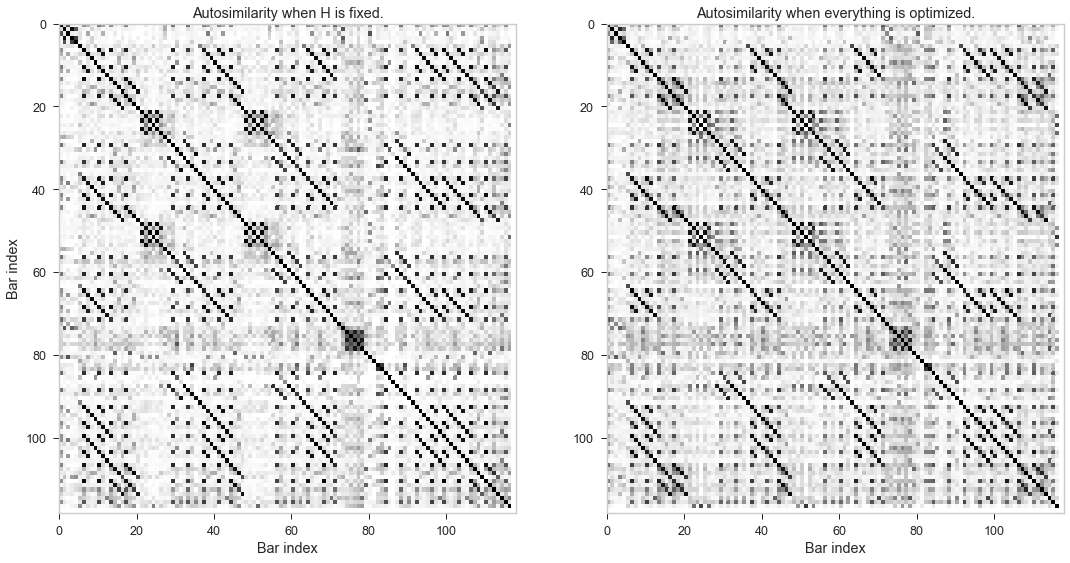

In [14]:
def study_impact_column_axel_without_permutation(fac, core, factor_number, columns, transpose = False, plotting = False, norm = 1):
    permutated_factor = fac[factor_number]
    cropped_factors = copy.deepcopy(fac)
    cropped_factors[factor_number] = np.zeros_like(fac[factor_number])
    if transpose:
        cropped_factors[factor_number][columns] = permutated_factor[columns]
    else:
        cropped_factors[factor_number][:,columns] = permutated_factor[:,columns]
    if plotting:
        plot_me_this_spectrogram(cropped_factors[factor_number])
    return tl.norm(tl.tenalg.multi_mode_dot(core, cropped_factors, transpose = False), 1) / tl.norm(tl.tenalg.multi_mode_dot(core, fac, transpose = False), 1)

H_0 = build_H(12,3)
rank_Q = 24
plot_me_this_spectrogram(H_0, title = "Built $H$ matrix")
dataset_paths = scr.load_RWC_dataset(dataset, annotations_type)
#for song_and_annotations in dataset_paths:
song_and_annotations = dataset_paths[0]
song_number = song_and_annotations[0].replace(".wav","")
annot_path = "{}\\{}".format(annotations_folder, song_and_annotations[1])
annotations = dm.get_segmentation_from_txt(annot_path, annotations_type)
references_segments = np.array(annotations)[:, 0:2]

bars, spectrogram = scr.load_or_save_spectrogram_and_bars(persisted_path, "{}\\{}".format(dataset, song_number), "pcp", hop_length)

tfb_tensor =  tf.tensorize_barwise(spectrogram, bars, hop_length_seconds, subdivision)
ranks = [12,H_0.shape[0],rank_Q]
core, factors = NTD.ntd(tfb_tensor, ranks, init='custom', core_0=np.random.random(tuple(ranks)), factors_0=[np.identity(12), H_0.T, np.random.random((tfb_tensor.shape[2], ranks[2]))], n_iter_max=100, tol=1e-06, sparsity_coefficients=[], fixed_modes=[0,1], normalize=[False, False, False, True], mode_core_norm=2, hals=False, verbose=False, return_errors=False, deterministic=False)

#for i in range(H_0.shape[0]):
#    print("Poids ligne {}: {}".format(i, study_impact_column_axel_without_permutation(factors, core, 1, [i], transpose = False, plotting = False, norm = 1)))

annotations_frontiers_barwise = dm.frontiers_from_time_to_bar(references_segments[:,1], bars)
autosimilarity = as_seg.get_autosimilarity(factors[2], transpose = True, normalize = True)
plot_permuted_factor(factors[2], title = "$Q$ matrix when $H$ is fixed.")

persisted_arguments = "_{}_{}_{}_{}".format(song_number, "pcp", "chromas", subdivision)
classic_core, classic_factors = scr.NTD_decomp_as_script(persisted_path, persisted_arguments, tfb_tensor, [12,32,rank_Q], init = "chromas")
classic_autosimilarity = as_seg.get_autosimilarity(classic_factors[2], transpose = True, normalize = True)
plot_permuted_factor(classic_factors[2], title = "$Q$ matrix when everything is optimized.")

fig, axs = plt.subplots(1, 2, figsize=(18,9))
padded_autosim_sign = pad_factor(autosimilarity)
padded_autosim_q = pad_factor(classic_autosimilarity)

axs[0].set_ylabel("Bar index")
axs[0].pcolormesh(np.arange(padded_autosim_sign.shape[0]), np.arange(padded_autosim_sign.shape[0]), padded_autosim_sign, cmap = cm.Greys)
axs[0].set_title('Autosimilarity when H is fixed.')
axs[1].pcolormesh(np.arange(padded_autosim_q.shape[0]), np.arange(padded_autosim_q.shape[0]), padded_autosim_q, cmap = cm.Greys)
axs[1].set_title('Autosimilarity when everything is optimized.')
for i in range(0,2):
    axs[i].set_xlabel("Bar index")
    axs[i].invert_yaxis()
plt.show()


Even if we can't conclude on an example, it looks like we don't lose a lot in quality by using our built matrix. It's a first, and a bit promising step.

# Averaging the $H$ matrix, columnwise, with permutation.

Finally, as a confirmation, for each of the studied ranks, we will compute the average $H$ matrix, where columns are associated by their indexes in the permutation matrix.

This technique is really limited by the permutation of columns, and is not really satisfactory.


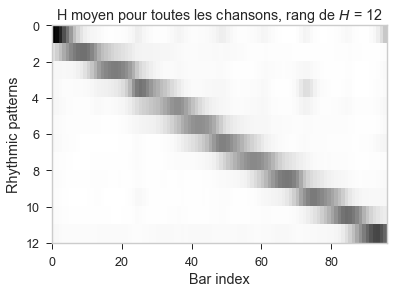

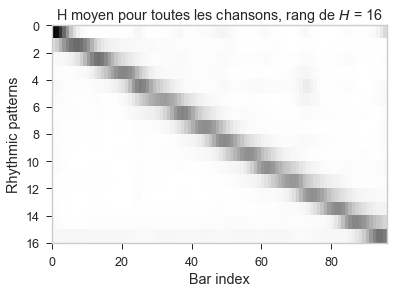

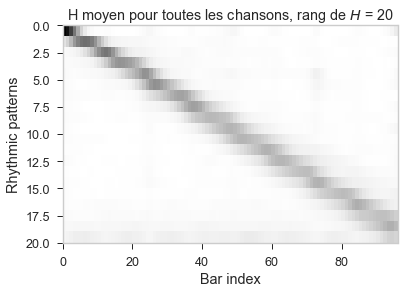

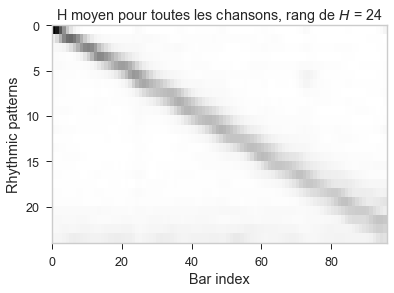

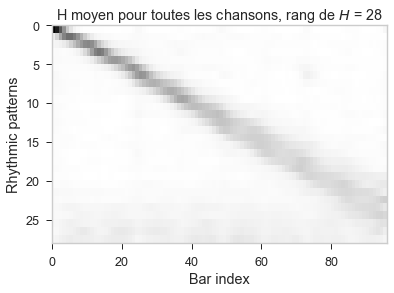

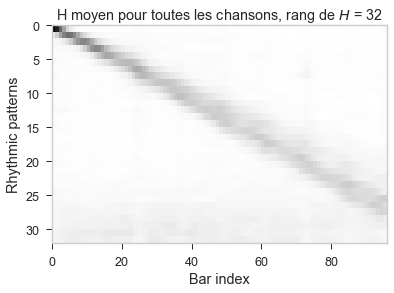

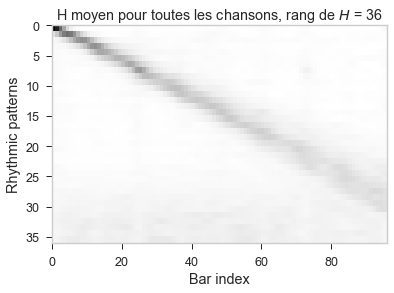

In [9]:
dataset_paths = scr.load_RWC_dataset(dataset, annotations_type)
for rank_h in h_ranks:
    all_h = []
    ranks = [12,rank_h,32]
    median_h = np.zeros((rank_h,96))
    for song_and_annotations in dataset_paths:
        song_number = song_and_annotations[0].replace(".wav","")
        bars, spectrogram = scr.load_or_save_spectrogram_and_bars(persisted_path, "{}\\{}".format(dataset, song_number), "pcp", hop_length)
        tensor_spectrogram = tf.tensorize_barwise(spectrogram, bars, hop_length_seconds, subdivision)
        persisted_arguments = "_{}_{}_{}_{}".format(song_number, "pcp", "chromas", subdivision)
        core, factors = scr.NTD_decomp_as_script(persisted_path, persisted_arguments, tensor_spectrogram, ranks, init = "chromas")

        h = permutate_factor(factors[1])
        median_h += factors[1].T[h]

    plot_me_this_spectrogram(median_h, title = "H moyen pour toutes les chansons, rang de $H$ = {}".format(rank_h), x_axis = "Bar index", y_axis = "Rhythmic patterns")

It seems to lightly confirm the previous conclusions though, that the larger the rank and the more specific columns are, and the more "blurry columns" we have (the number of non-stairish columns at the end).